## **Rani Son**

# **Problem 1 Python**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")


## **First, I will import the libraries and import the dataset contatining numeric and categoric information about adults to perform analysis with decision trees.**

## **Here I am just getting a view of the dataset I obtained.**

In [ ]:
adultDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


## **To help simply the process for classification I will have two predictors and 1 target. Those being *Maritial-Status, Captial-gains-losses, and income respectivly*.**

## **Captial-gain-loss is a new predictor created to combine the captial-gain and captial-loss to further simplify.**

In [ ]:
# The new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# A new dataframe for classification: marital-status, capitial-gains-losses, and income.
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


## **The seaborn library helps to visual data and particularly here I examine the distributions of the income below and equal to 50K and above 50K.**

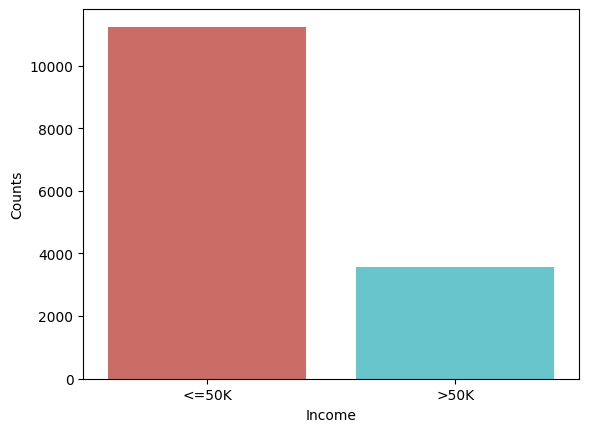

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

## **In order to feed the categoric data to the model I want to build I need to encode it so the model can undestand the data. This hepls to simply and transforms the data into nominal and numeric numbers for the model to understand.**

In [ ]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]

encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


## **Now that I have encoded the data, I am preparing the model by creators the predictors as X and the target as y. Then, I am preparing for a model that has a 70% training data and 30% test data.**

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 70-30 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.70, stratify=y)



## **Here, I am examining the class distibutions of the training and testing datasets.**

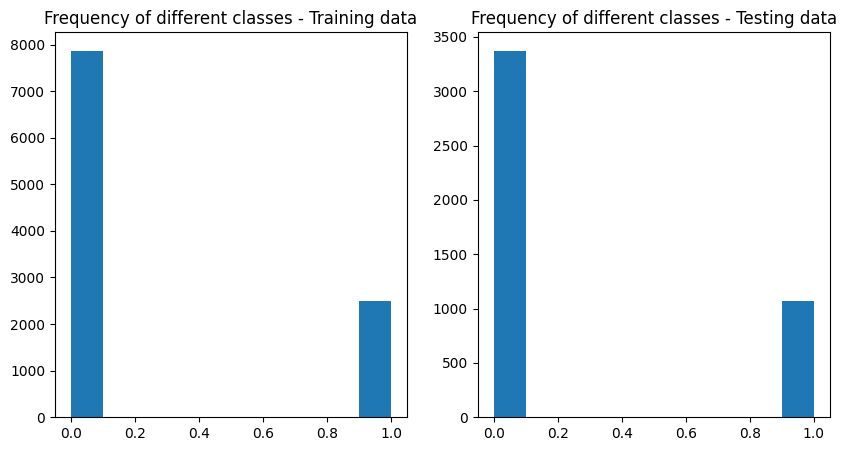

In [ ]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


## **The first decision tree classifier I will use is the CART classifier that uses the Gini index to measure the impurity of a node.**

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1822.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1822.50
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



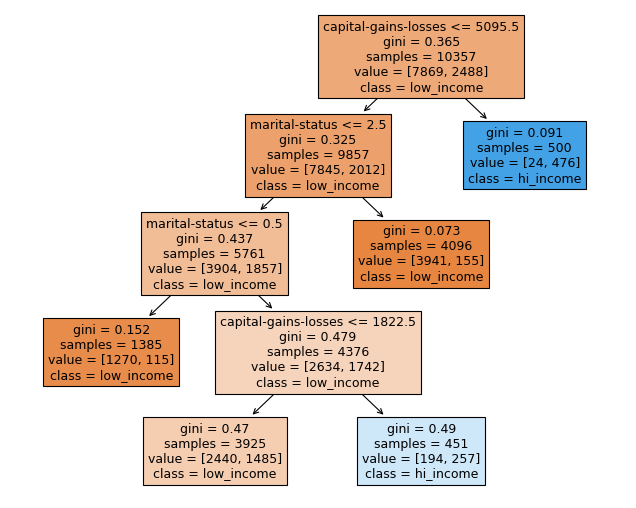

In [ ]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)


# Plotting the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(),
                                class_names=cn,
                                filled = True)


# Printing the text representation of the tree
text_representation = tree.export_text(cart_classifier,
                                       feature_names=X.columns.values.tolist())
print(text_representation)



## **In this classifier, I can see that the classifier chose 'capitial-gains-losses' as the parent node. Also, becaues I set the max_leaf_nodes to 5, the classifiers stop pruning after the fifth node. Overall the level of gini-index indicates that the purity of these nodes are low as most of the nodes have high gini index.**

## **The second decision tree classifier I will use is the C5.0 classifier that uses entropy to measure the impurity of a node.**

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



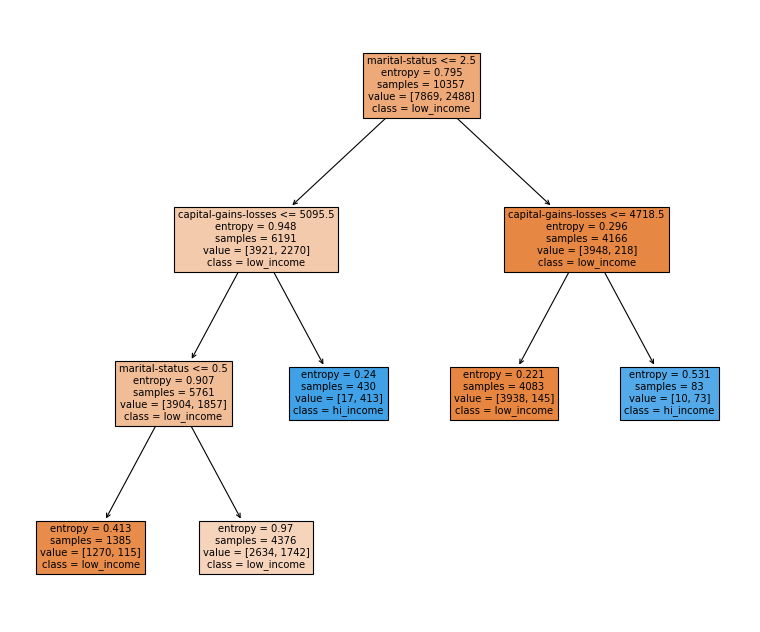

In [ ]:
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=5,
                                       random_state = 120).fit(X_train,y_train)


from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)


# Plotting the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(c5_classifier, feature_names=X.columns.values.tolist(),
                                class_names=cn,
                                filled=True)


# Printing the text representation of the tree
text_representation = tree.export_text(c5_classifier,
                                       feature_names=X.columns.values.tolist())
print(text_representation)





## **In this classifier, I see that 'marital-status' was chosen as the parent node as opposed to 'capital-gains-losses' from the CART classifier. Like the first classifier, I set the max_leaf-_nodes to 5 and it seems that the levels of overall the levels of entropy in the nodes vary from low to high. About half the nodes have entropy close to 1 meaning close to pure while the others are considerably less.**

## **Next, I will use the score function to record the classification accuracy of the training and test datasets for both the Cart and C5 classifiers.**

In [ ]:
# CART
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# C5
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))





CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


## **The .score functions measure the variance that our depdepent variable that can be explained by our independent variable. It tells us how well our model fits our observed data and the closer to 1 the better. I oberserved that both the Cart and C5 training and testing score are close or are 0.8, meaning the model fit 80% of the data, which is pretty good.**

## **Confusion matrixes help us to observe how many of our classifier's prediictions were correct and incorrect, I have made confusion matrics for Cart and C5.**

In [ ]:
from sklearn.metrics import confusion_matrix

# Record CART's and C5's predictions
cart_predictions = cart_classifier.predict(X_test)
c5_predictions = c5_classifier.predict(X_test)


# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test,
                           y_pred = cart_predictions)

c5_cm = confusion_matrix(y_true=y_test,
                        y_pred = c5_predictions)

# Print CART's confusion matrix
print(cart_cm)

print("-----------")

# Print C5's confusion matrix
print(c5_cm)


[[3287   87]
 [ 753  313]]
-----------
[[3356   18]
 [ 859  207]]


## **The main diagonal of the confusion matrix shows the agreement in predictions between two classes. Here, the matrix is predicting whether it is low income or high income and on the main diagonal both predictors have a higher amount of agreement for low, but lower for high. It seems that class 1 misdentified many high income adults.**

## **This the heatmap of the confusion matrix for the Cart classifer. The heatmap shows the same information as the confusion matrix, but gives a color coded representation to show the variance.**

Text(0.5, 118.72222222222216, 'Predicted label')

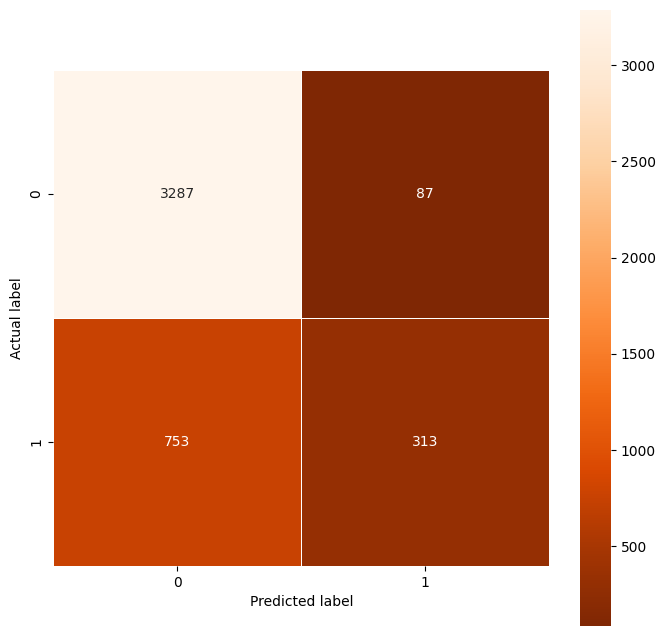

In [ ]:
# Visualize CART's confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cart_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')



## **This the heatmap of the confusion matrix for the C5 classifer. The heatmap shows the same information as the confusion matrix, but gives a color coded representation to show the variance.**

Text(0.5, 118.72222222222216, 'Predicted label')

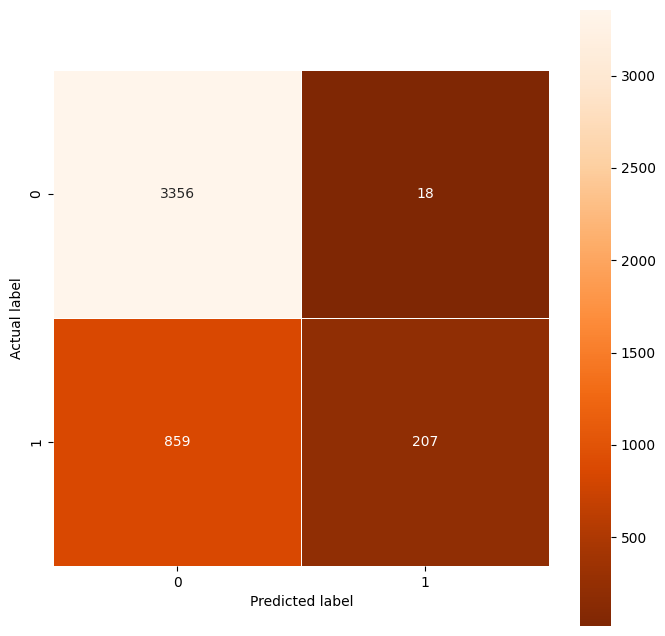

In [ ]:
# Visualize C5's confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(c5_cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')



## **Now that we have both classifiers, we can compare them.**

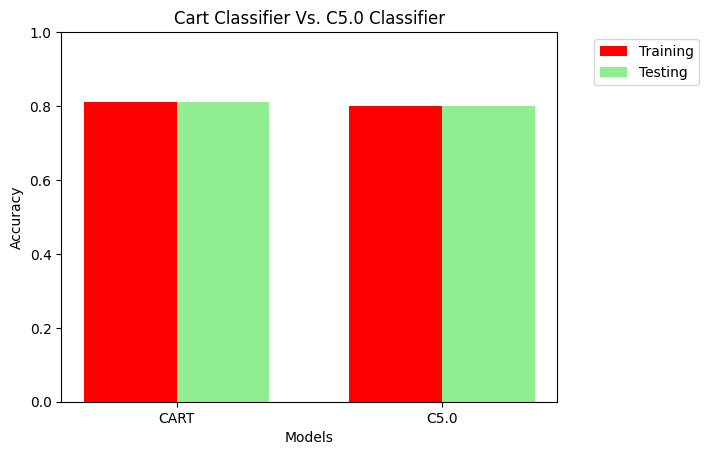

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['CART', 'C5.0']
training_scores = [score1, score3]
testing_scores =  [score2, score4]

x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='red')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='lightgreen')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Cart Classifier Vs. C5.0 Classifier')
plt.show()



## **After seeing them side by side and knowing the accuracy score from eariler, I oberseved that both models' accuracy levels are very close. This is also taking into account that I have set the max_leaf_node for each to be 5 and not set the max_depth, which I will do in the next step to see how that changes the classifiers.**

## ***For the next part of the project, I will be changing the values of the max_leaf nodes and max_depth to observe how they cahange the accuracy scores.***

In [ ]:
#changing max_leaf_nodes
#max_leaf_nodes=3
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                        max_leaf_nodes=3,
                                         random_state = 120).fit(X_train, y_train)

score1 = round(cart_classifier.score(X_train, y_train), 2)
score2 = round(cart_classifier.score(X_test, y_test), 2)

print ("Max-leaf-nodes=3: %.2f, %.2f" %  (score1, score2))

#max_leaf_nodes=4
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                        max_leaf_nodes=4,
                                         random_state = 120).fit(X_train, y_train)

score1 = round(cart_classifier.score(X_train, y_train), 2)
score2 = round(cart_classifier.score(X_test, y_test), 2)

print ("Max-leaf-nodes=4: %.2f, %.2f" %  (score1, score2))

#changing max_deapth
#max_depth=2
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                        max_depth=2,
                                         random_state = 120).fit(X_train, y_train)

score1 = round(cart_classifier.score(X_train, y_train), 2)
score2 = round(cart_classifier.score(X_test, y_test), 2)

print ("Max-depth=2: %.2f, %.2f" %  (score1, score2))

#max_depth=3
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                        max_depth=3,
                                         random_state = 120).fit(X_train, y_train)

score1 = round(cart_classifier.score(X_train, y_train), 2)
score2 = round(cart_classifier.score(X_test, y_test), 2)

print ("Max-depth=3: %.2f, %.2f" %  (score1, score2))

#max_depth=4
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                        max_depth=4,
                                         random_state = 120).fit(X_train, y_train)

score1 = round(cart_classifier.score(X_train, y_train), 2)
score2 = round(cart_classifier.score(X_test, y_test), 2)

print ("Max-depth=4: %.2f, %.2f" %  (score1, score2))

Max-leaf-nodes=3: 0.80, 0.80
Max-leaf-nodes=4: 0.80, 0.80
Max-depth=2: 0.80, 0.80
Max-depth=3: 0.81, 0.80
Max-depth=4: 0.81, 0.81


## **Here I am observing how changing the max-leaf-nodes and max-depth will affect the scores for cart classifier. For max-leaf-nodes, the score did not change, but for depth it seems the scores did slighting imporve the deeper the depth.**

In [ ]:
#changing max_leaf_nodes
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=3,
                                       random_state = 120).fit(X_train,y_train)

score3 = round(c5_classifier.score(X_train, y_train), 2)
score4 = round(c5_classifier.score(X_test, y_test), 2)

print ("Max-leaf-nodes=3: %.2f, %.2f" %  (score3, score4))

c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=4,
                                       random_state = 120).fit(X_train,y_train)

score3 = round(c5_classifier.score(X_train, y_train), 2)
score4 = round(c5_classifier.score(X_test, y_test), 2)

print ("Max-leaf-nodes=3: %.2f, %.2f" %  (score3, score4))

#changing max_deapth
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_depth=3,
                                       random_state = 120).fit(X_train,y_train)

score3 = round(c5_classifier.score(X_train, y_train), 2)
score4 = round(c5_classifier.score(X_test, y_test), 2)

print ("Max-depth=2: %.2f, %.2f" %  (score3, score4))

c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_depth=4,
                                       random_state = 120).fit(X_train,y_train)

score3 = round(c5_classifier.score(X_train, y_train), 2)
score4 = round(c5_classifier.score(X_test, y_test), 2)

print ("Max-depth=4: %.2f, %.2f" %  (score3, score4))

c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_depth=5,
                                       random_state = 120).fit(X_train,y_train)

score3 = round(c5_classifier.score(X_train, y_train), 2)
score4 = round(c5_classifier.score(X_test, y_test), 2)

print ("Max-depth=5: %.2f, %.2f" %  (score3, score4))




Max-leaf-nodes=3: 0.80, 0.80
Max-leaf-nodes=3: 0.80, 0.80
Max-depth=2: 0.80, 0.80
Max-depth=4: 0.81, 0.81
Max-depth=5: 0.83, 0.82


## **Here I am observing how changing the max-leaf-nodes and max-depth will affect the scores for C5 classifier. Again, changing the max-leaf-nodes did not change the score, but increasing the depth seems to have caused a greater score change than in the CART classifier.**

# ***Conclusions***

## **After having built the CART and C5 classifiers and comparing them, I observed that had roughly the same predications with the CART classifier scoring 1% higher than the C5 classifier. Seeing as both had almost the same score, it shows in their respective confusion matrixes as the main diagonal in both also predicted simliar results.**

## **Thinking about the way the two classifiers make their model it makes sense that they are so simliar. CART uses Gini and C5 uses entropy to measure the impurity of a node. Both are used to measure the same thing, but Gini is a bit less data intensive as it does not use log.**

## **I did observe that changing certain aspects such as max-depth did increase the score for the C5 classifier much more than the CART classifier. Overall, it makes sense that both classifiers had the same score because they both are measuring the same thing.**